# Haar OpenCV Face Detect

Kevin Walchko, 7 Dec 2016

-----------

In this lesson we will learn how to detect faces in an image using OpenCV. We we will also understand, at a high level, how the process works.

## References

- [OpenCV 3.x Haar Tutorial](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)
- [Wikipedia Viola-Jones detector](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework)
- [Wikipedia Adaboost description](https://en.wikipedia.org/wiki/AdaBoost)
- [Wikipedia XML definition](https://en.|wikipedia.org/wiki/XML)

## Setup

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import cv2
from math import sqrt

# Face Detector

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive (faces in the image) and negative images (no faces in the image). It is then used to detect objects (faces in this case) in other images.

The algorithm has four stages:

1. Haar Feature Selection
1. Creating an Integral Image
1. Adaboost Training
1. Cascading Classifiers

## Haar Features

All human faces share some similar properties. These regularities may be matched using Haar Features. A few properties common to human faces:

- The eye region is darker than the upper-cheeks.
- The nose bridge region is brighter than the eyes.

Composition of properties forming matchable facial features:

- Location and size: eyes, mouth, bridge of nose
- Value: oriented gradients of pixel intensities: $feature = \sum{pixel_{white}} - \sum{pixel_{black}}$

The four features matched by this algorithm are then sought in the image of a face.

![](haar_features.jpg)
![](haar.png)

## Integral Image

An image representation called the integral image evaluates rectangular features in constant time, which gives them a considerable speed advantage over more sophisticated alternative features. Because each feature's rectangular area is always adjacent to at least one other rectangle, it follows that:

- any two-rectangle feature can be computed in six array references
- any three-rectangle feature in eight
- any four-rectangle feature in nine.

## Adaboost

Adaboost, short for "Adaptive Boosting", is a machine learning meta-algorithm formulated by Yoav Freund and Robert Schapire who won the Gödel Prize in 2003 for their work. It can be used in conjunction with many other types of learning algorithms to improve their performance.

## Cascade Architecture

Since most of the area of an images does not contain a face, you want to use simple, fast deterectors to see if the posibility of a face exists. Thus, a cascade of gradually more complex classifiers achieves even better detection rates and quickly eliminates images without faces.

# Game of Thrones

Ok, let's get some good images to play with and see if we can detect things.

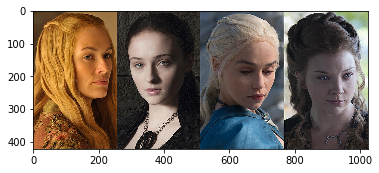

In [3]:
image = cv2.imread('face_pics/got3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # pretty images
plt.imshow(image);

Here we will deal with detection. OpenCV already contains many pre-trained classifiers for face, eyes, smile etc. Those XML (extended markup language) files are stored in `??` folder. Let's create face a detector with OpenCV.

First we need to load the required XML classifiers. Then load our input image (or video) in grayscale mode.

In [4]:
# convert our image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# load the haar face detector for the front
faceCascade = cv2.CascadeClassifier('face_pics/haarcascade_frontalface_default.xml')

The next step is to detect faces in our image. The `cv2.CascadeClassifier.detectMultiScale` function is used to detect faces and after computation, it returns a numpy array where the co-ordinates of the faces in the image are stored. The function is called detectMultiScale because it can detect objects at multiple scales. After each level the classifier will resize the image based on the scale provided to detect the object. If the number of levels that the cascade is trained for are exhausted, then the object is not detected. The signature of the function is:

`cv2.CascadeClassifier.detectMultiScale(image, rejectLevels, levelWeights[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize[, outputRejectLevels]]]]]])`

Here,
- image – Matrix of the type CV_8U containing an image where objects are detected.
- objects – Vector of rectangles where each rectangle contains the detected object.
- scaleFactor – Parameter specifying how much the image size is reduced at each image scale.
- minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.
- flags – Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. It is not used for a new cascade.
- minSize – Minimum possible object size. Objects smaller than that are ignored.
- maxSize – Maximum possible object size. Objects larger than that are ignored.

Faces found: 4


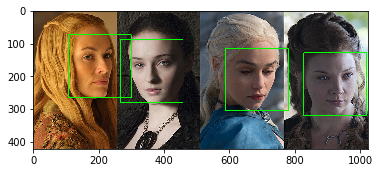

In [6]:
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=2,
    minNeighbors=2,
    minSize=(30, 30)
    #flags = cv2.CV_HAAR_SCALE_IMAGE
)

print('Faces found: {}'.format(len(faces)))

# make a copy of the image to draw on
tmp = image.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(tmp, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(tmp);

# Now What?

So think about and propose how you could:

- Find a person based on skin color
- Find a person based on male/female
- How would you build a cat detector?
- What is a good way to code so you could find a female, with light skin, holding a cat?


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.